# Proyek Analisis Data: Nama dataset
- Nama: Septhara Adhityo Rohman
- Email: adityarsepthara@gmail.com
- Id Dicoding: septhara_adhityo

## Menentukan Pertanyaan Bisnis

1. Bagaimana jumlah penyewa sepeda pada tahun 2011 - 2012?
2. Bagaimana kondisi penyewa pada hari libur dan hari biasa?
3. Berapa jumlah penyewa sepeda berdasarkan hari dan musim?

## Menyaipkan semua library yang dibutuhkan

In [ ]:
pip install streamlit babel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01/01/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01/01/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01/01/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01/01/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

1. Mengecek tipe data dari data day.csv serta mengecek apakah terdapat duplikasi data atau tidak.

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


2. Setelah dicek, bahwa data day.csv tidak terdapat duplikasi data.

In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Describe ini digunakan untuk mencari tahu apakah terdapat keanehan dari data tersebut. Hasilnya tidak terdapat keanehan dari data tersebut.

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


3. Mengecek tipe data dari data hour.csv serta mengecek apakah terdapat duplikasi data atau tidak.

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada data hour.csv tidak terdapat duplikasi data

In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Data hour.csv tidak memiliki keanehan data.

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

1. Mengubah beberapa detail pada kolom

Menyesuaikan nama kolom agar mudah di pahami

In [ ]:
# Mengubah nama kolom

day_df.rename (columns={
    'dteday' : 'dateday',
    'yr' : 'year',
    'mnth' : 'month',
    'cnt' : 'count'
}, inplace=True)

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#Convert dateday ke date time
day_df['dateday'] = pd.to_datetime(day_df['dateday'])

In [ ]:
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Menyesuaikan weekday dengan dateday
day_df['weekday'] = day_df['dateday'].dt.day_name()
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Menyesuaikan month dengan dateday
day_df['month'] = day_df['dateday'].dt.month_name()
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Mengubah keterangan pada kolom season
seas = ['springer', 'summer', 'fall', 'winter']
day_df['season'] = day_df['season'].replace([1,2,3,4],seas)
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,springer,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,0,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,0,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,0,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,0,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Mengubah keterangan pada kolom year
day_df['year'] = day_df['dateday'].dt.year
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,springer,2011,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Menormalisasi nilai dari temp, atemp, hum dan windspeed
day_df['temp'] = day_df['temp']*41
day_df['atemp'] = day_df['atemp']*50
day_df['hum'] = day_df['hum']*100
day_df['windspeed'] = day_df['windspeed']*67
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,springer,2011,January,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,springer,2011,January,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,springer,2011,January,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,springer,2011,January,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,springer,2011,January,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Explorratory Data Analysis (EDA)

In [ ]:
# mengelompokan penyewa sepeda berdasarkan bulan
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
            max   min         mean     sum
month                                     
April      7460   795  4484.900000  269094
August     7865  1115  5664.419355  351194
December   6606   441  3403.806452  211036
February   5062  1005  2655.298246  151352
January    4521   431  2176.338710  134933
July       8173  3285  5563.677419  344948
June       8120  3767  5772.366667  346342
March      8362   605  3692.258065  228920
May        8294  2633  5349.774194  331686
November   6852  1495  4247.183333  254831
October    8156    22  5199.225806  322352
September  8714  1842  5766.516667  345991

Pada data tersebut terlihat bahwa Bulan Juni memiliki rata-rata peminjam sepeda terbanyak yakni 5,772 serta memiliki 346,342 total sepeda yang siap di sewa. Sedangkan bulan Januari memiliki rata-rata peminjam sepeda paling sedikit yakni 2,176 dan juga memiliki 134,933 total sepeda yang siap di sewa.

In [ ]:
# Membandingkan penyewaan sepeda pada hari libur dan biasa

day_df.groupby(by='holiday').agg({
    'count':['max', 'min', 'mean', 'sum']
})

count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Pada data tersebut terlihat bahwa konsumen tertarik untuk menyewa sepeda pada hari biasa dibandingkan hari libur.

In [ ]:
# Meneliti jumlah penyewa sepeda berdasarkan hari

day_df.groupby(by='weekday').agg({
    'count':['max', 'min','mean']
})

count                   
            max   min         mean
weekday                           
Friday     8362  1167  4690.288462
Monday     7525    22  4338.123810
Saturday   8714   627  4550.542857
Sunday     8227   605  4228.828571
Thursday   7804   431  4667.259615
Tuesday    7767   683  4510.663462
Wednesday  8173   441  4548.538462

Pada data tersebut terlihat bahwa hari Jum'at merupakan hari yang paling diminati konsumen untuk menyewa sepeda. Sedangkan hari Minggu, konsumen cenderung kurang berminat dalam menyewa sepeda.

In [ ]:
# Mengelompokan jumlah penyewa sepeda berdasarkan season
day_df.groupby(by='season').agg({
    'count':['max','min','mean']
})

count                   
           max   min         mean
season                           
fall      8714  1115  5644.303191
springer  7836   431  2604.132597
summer    8362   795  4992.331522
winter    8555    22  4728.162921

Pada data diatas rata-rata konsumen paling banyak menyewa sepeda pada musing gugur (Fall). Sedangkan pada musim semi (spinger) rata-rata konsumen menyewa sepeda paling sedikit.

### **Visualization & Explanatory Analysis**

### **Pertanyaan 1: Bagaimana Jumlah Penyewaan Sepeda pada Tahun 2011 - 2012?**

In [ ]:
monthly_users_df = day_df.resample(rule='M', on='dateday').agg({
    "casual":"sum",
    "registered":"sum",
    "count":"sum"
})
monthly_user_df.head()

,casual,registered,count
dateday,,,
2011-01-31,3073,35116,38189
2011-02-28,6242,41973,48215
2011-03-31,12826,51219,64045
2011-04-30,22346,72524,94870
2011-05-31,31050,104771,135821


In [ ]:
monthly_users_df.index = monthly_users_df.index.strftime('%B')
monthly_users_df.head()

,casual,registered,count
dateday,,,
January,3073,35116,38189
February,6242,41973,48215
March,12826,51219,64045
April,22346,72524,94870
May,31050,104771,135821


In [ ]:
monthly_users_df = monthly_users_df.reset_index()
monthly_users_df = monthly_users_df.rename(columns={'dateday':'month'})
monthly_users_df.head()

,month,casual,registered,count
0,January,3073,35116,38189
1,February,6242,41973,48215
2,March,12826,51219,64045
3,April,22346,72524,94870
4,May,31050,104771,135821


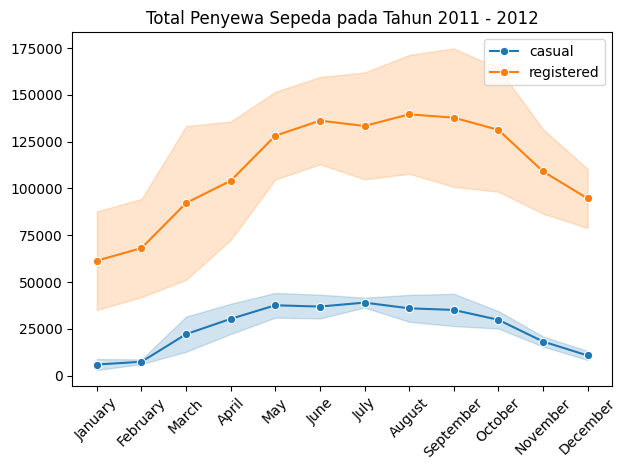

In [ ]:
sns.lineplot(x="month", y="casual", data=monthly_users_df, label ='casual', marker="o")
sns.lineplot(x="month", y="registered", data=monthly_users_df, label ='registered', marker="o")

plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45)
plt.title("Total Penyewa Sepeda pada Tahun 2011 - 2012")

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

1. Jumlah penyewa di tahun 2012 lebih banyak di bandingkan dengan tahun 2011.
2. Jumlah penyewa casual lebih sedikit dibandingkan dengan penyewa registered.
3. Dari data menunjukan bahwa jumlah penyewa dari tahun 2011 - 2012 cenderung naik dari bulan  ke bulan.

### Pertanyaan 2: Bagaimana Kondisi Penyewa Saat Hari Libur (Holiday) dan Hari Biasa (Workingday)?

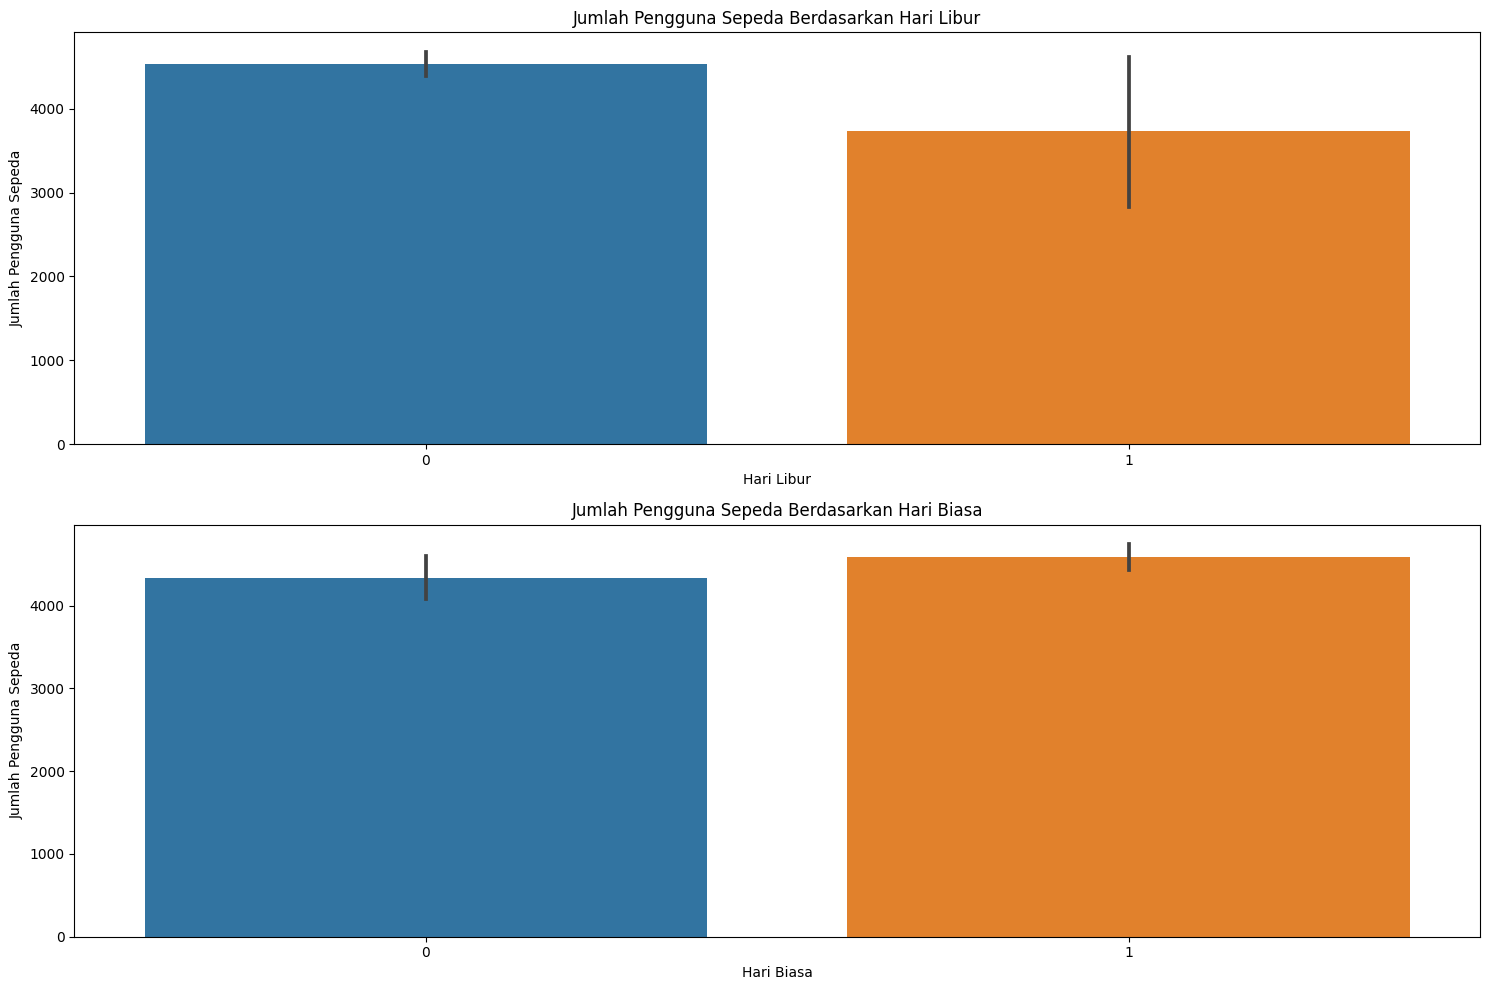

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,10))

# Data Berdasarkan Hari Libur (Holiday)
sns.barplot(
    x='holiday',
    y='count',
    data=day_df,
    ax=axes[0])
axes[0].set_title('Jumlah Pengguna Sepeda Berdasarkan Hari Libur')
axes[0].set_xlabel('Hari Libur')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

# Data Berdasarkan Hari Biasa (Workingday)
sns.barplot(
    x='workingday',
    y='count',
    data=day_df,
    ax=axes[1])
axes[1].set_title('Jumlah Pengguna Sepeda Berdasarkan Hari Biasa')
axes[1].set_xlabel('Hari Biasa')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

plt.tight_layout()
plt.show()

Pada data tersebut bisa kita lihat bahwa Konsumen lebih berminat menyewa sepeda di hari biasa (workingday) dibanding dengan hari libur (holiday). Jika di kelompokan berdasarkan hari libur, konsumen cenderung berminat menyewa sepeda pada saat hari libur biasa di bandingkan hari libur nasional.

### Pertanyaan 3: Berapa Jumlah Penyewa Sepeda Berdasarkan Hari dan Musim?

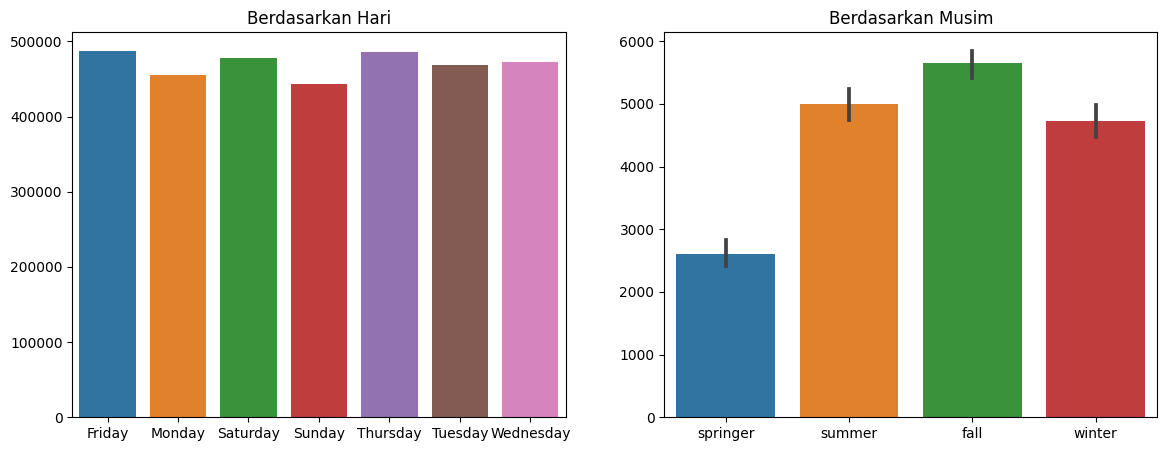

In [96]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))

sns.barplot(x='weekday', y='count', data=weekday_users_df, ax=axes[0])

axes[0].set_xlabel(None)
axes[0].set_ylabel(None)
axes[0].set_title("Berdasarkan Hari")

sns.barplot(x='season', y='count', data=day_df, ax=axes[1])

axes[1].set_xlabel(None)
axes[1].set_ylabel(None)
axes[1].set_title("Berdasarkan Musim")

plt.show()

Hari jum'at merupakan hari yang paling banyak orang menyewa sepeda, sedangkan hari minggu merupakan hari paling sedikit orang menyewa sepeda. Selain itu orang-orang cenderung menyewa sepeda pada musim gugur (fall) dibanding musim semi (springer).

## Conclusion

# **Conclution Pertanyaan 1**

Dapat dilihat bahwa Jumlah penyewa di tahun 2012 lebih banyak di bandingkan dengan tahun 2011. Dari data menunjukan bahwa jumlah penyewa dari tahun 2011 - 2012 cenderung naik dari bulan  ke bulan.

# **Conclution Pertanyaan 2**

Konsumen cenderung menyewa sepeda pada Hari Biaya (Workingday) hal ini dikarenakan mereka mungkin membutuhkan kendaraan untuk mengantarkan mereka ke kantor sehingga tren penyewaan sepeda lebih banyak di Hari Biasa. Selain itu konsumen cenderun menyewa sepeda pada hari libur biasa dibandingkan hari libur nasional

## **Conlution Pertanyaan 3**

Berdasarkan data bahwa konsumen cenderung menyewa sepeda di hari jum'at dengan rata-rata menyewa sebesar 4,690 dibanding hari minggu yang hanya menyewa dengan rata-rata 4,228. Selain itu konsumen cenderung menyewa sepeda di musim gugur (fall) dibanding musim semi (springer).